In [3]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances

sns.set_style('whitegrid')

# Problem definition

Cluster stations based on number of rides and membership

# Load the data

In [70]:
df = pd.read_csv('../../Data/Processed/bixiWeather.csv',low_memory=False)
print(df.columns)
df2=df

Index(['start_date', 'weekday', 'month', 'hour', 'num_week',
       'start_station_code', 'end_date', 'end_station_code', 'duration_min',
       'is_member', 'datetime', 'humidity', 'pressure', 'temp_celsius',
       'description', 'wind_speed', 'wind_direction'],
      dtype='object')


In [74]:
df = df.drop(['start_date','end_date','datetime'],axis=1)
df = df.set_index(['start_station_code', 'is_member', 'description'])
df.head()


,,,weekday,month,hour,num_week,end_station_code,duration_min,humidity,pressure,temp_celsius,wind_speed,wind_direction
start_station_code,is_member,description,,,,,,,,,,,
7060,1,few clouds,5,4,0,15,7060.0,30.683333,22.0,1027.0,13.0,4.0,260.0
6173,1,few clouds,5,4,0,15,6173.0,9.216667,22.0,1027.0,13.0,4.0,260.0
6203,1,few clouds,5,4,0,15,6204.0,3.250000,22.0,1027.0,13.0,4.0,260.0
6104,1,few clouds,5,4,0,15,6114.0,4.750000,22.0,1027.0,13.0,4.0,260.0
6174,1,few clouds,5,4,0,15,6174.0,9.483333,22.0,1027.0,13.0,4.0,260.0


# Feature Engineering 

In [75]:
# remove column
X_columns = list(df.columns)
if 'IncomeErr' in X_columns:
    X_columns.remove('IncomeErr')
if 'IncomePerCapErr' in X_columns:
    X_columns.remove('IncomePerCapErr')
df = df[X_columns]

# normalize the columns
df_norm = df.copy()
for col in X_columns:
    df_norm[col] = StandardScaler().fit_transform(df_norm[col].values.reshape(-1, 1))

print(df.shape)
df_norm.head()

C:\Users\dchan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(4018721, 11)


,,,weekday,month,hour,num_week,end_station_code,duration_min,humidity,pressure,temp_celsius,wind_speed,wind_direction
start_station_code,is_member,description,,,,,,,,,,,
7060,1,few clouds,1.037429,-2.009475,-2.727835,-2.081288,1.931029,1.525813,-2.736076,2.131269,-0.971351,0.064057,0.755479
6173,1,few clouds,1.037429,-2.009475,-2.727835,-2.081288,-0.383182,-0.432483,-2.736076,2.131269,-0.971351,0.064057,0.755479
6203,1,few clouds,1.037429,-2.009475,-2.727835,-2.081288,-0.302302,-0.976792,-2.736076,2.131269,-0.971351,0.064057,0.755479
6104,1,few clouds,1.037429,-2.009475,-2.727835,-2.081288,-0.537115,-0.839955,-2.736076,2.131269,-0.971351,0.064057,0.755479
6174,1,few clouds,1.037429,-2.009475,-2.727835,-2.081288,-0.380573,-0.408156,-2.736076,2.131269,-0.971351,0.064057,0.755479


# Model Training

In [76]:
k = 10
kmeans = KMeans(n_clusters=k).fit(df_norm.values)

print(set(kmeans.labels_))
print(collections.Counter(kmeans.labels_))



{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Counter({1: 603815, 3: 598048, 9: 581982, 7: 570512, 6: 447806, 0: 444645, 8: 363328, 4: 255700, 2: 138606, 5: 14279})


In [77]:
df_results = df.copy()
df_norm['cluster'] = kmeans.labels_
df_results['cluster'] = kmeans.labels_

[(6100, 4747), (6184, 4483), (6015, 3922), (6406, 3844), (6078, 3664)]
[(6100, 6690), (6136, 4777), (6221, 4618), (6015, 4564), (6184, 4544)]
[(6026, 3427), (6036, 3266), (6501, 3103), (6406, 2892), (6050, 2449)]
[(6100, 8229), (6078, 6640), (6015, 6029), (6064, 5808), (6184, 5424)]
[(6100, 3226), (6078, 2475), (6184, 2288), (6064, 2287), (6136, 2231)]
[(7052, 1376), (6921, 1095), (6350, 914), (7070, 913), (6349, 900)]
[(6100, 5403), (6015, 4441), (6064, 3706), (6136, 3613), (6184, 3601)]
[(6100, 7227), (6078, 6938), (6184, 5460), (6012, 5414), (6064, 5307)]
[(6100, 4223), (6015, 3747), (6184, 3403), (6078, 3245), (6406, 3169)]
[(6100, 6676), (6136, 5210), (6184, 4882), (6221, 4636), (6078, 4407)]
weekday


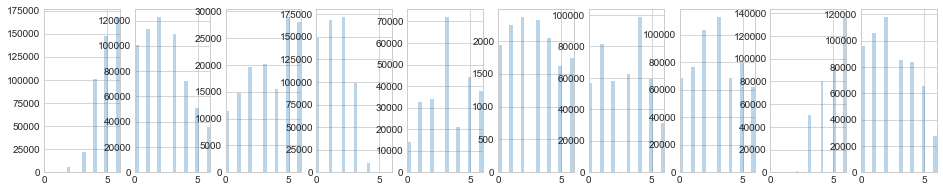

month


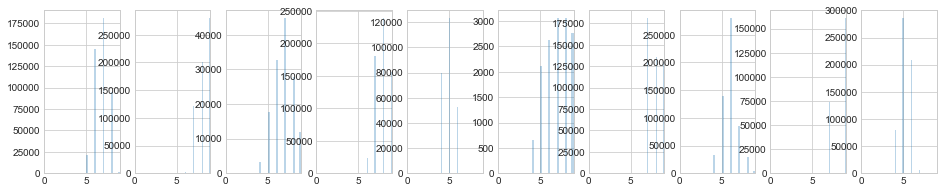

hour


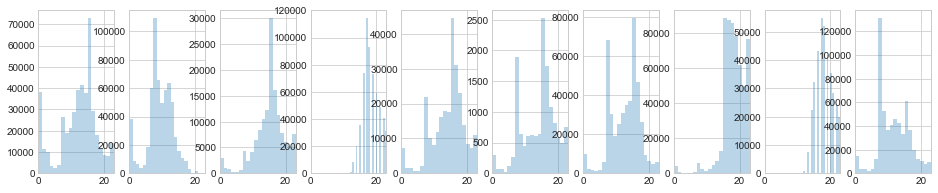

num_week


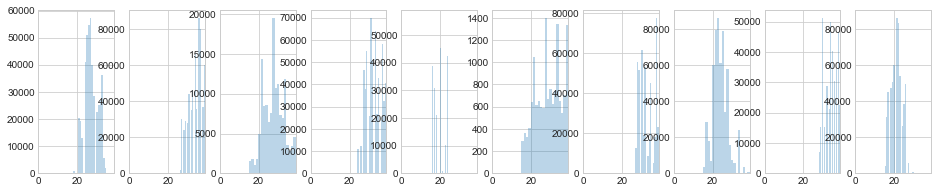

end_station_code


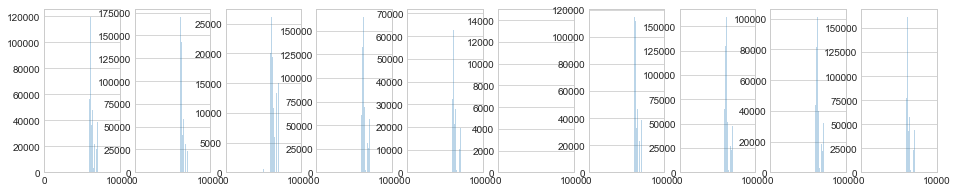

duration_min


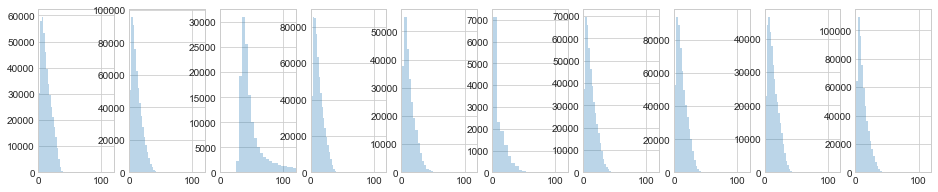

humidity


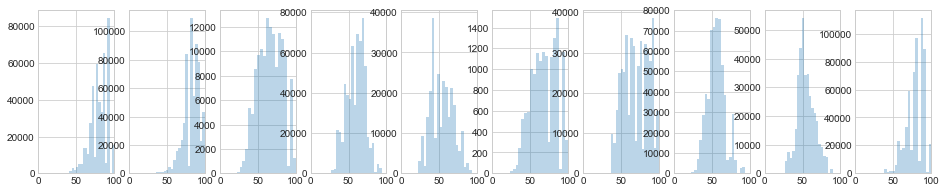

pressure


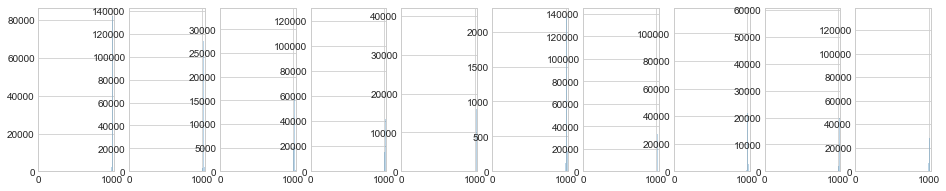

temp_celsius


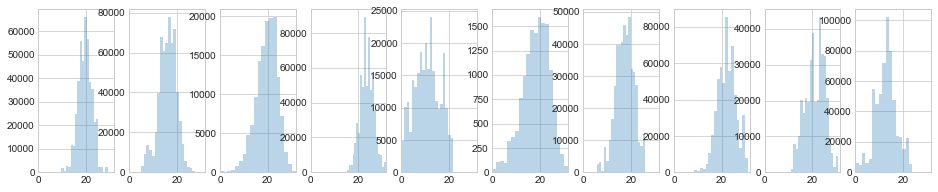

wind_speed


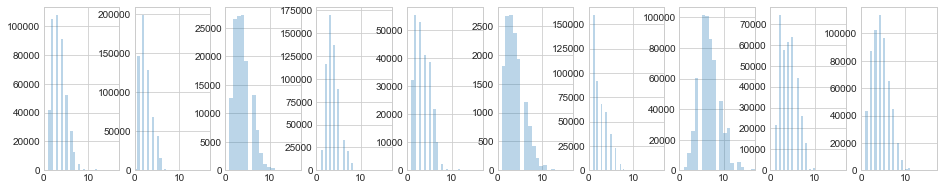

wind_direction


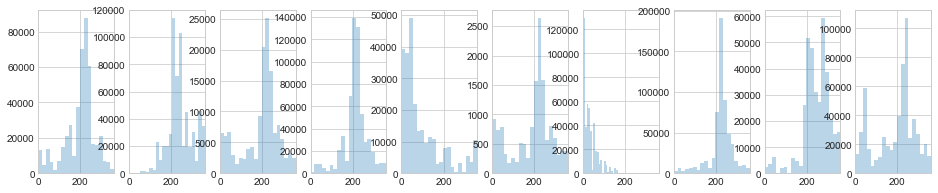

In [79]:
# Analyze the results
df_results = df_results.reset_index()
for cluster in sorted(set(kmeans.labels_)):
    print(collections.Counter(df_results[df_results['cluster']==cluster]['start_station_code']).most_common(5))

n_clusters = len(set(kmeans.labels_))
for col in X_columns:
    print(col)
    i = 1
    plt.figure(figsize=(16,3))
    for cluster in sorted(set(kmeans.labels_)):
        plt.subplot(1, n_clusters, i)
        plt.xlim([0,df_results[col].max()])
        plt.hist(df_results[df_results['cluster']==cluster][col], label=str(cluster), alpha=0.3, bins=20)
        i += 1
    plt.show()

In [80]:
# Analyze the centroids
df_results.groupby('cluster').mean().round(2).T

cluster,0,1,2,3,4,5,6,7,8,9
index,1808153.83,3012708.07,1868388.36,2707053.92,445053.28,2030799.43,2784166.18,1148108.95,3122412.82,678715.41
start_station_code,6325.92,6339.90,6335.96,6316.42,6313.23,6615.85,6330.95,6309.69,6320.29,6325.17
is_member,0.72,0.84,0.49,0.84,0.83,0.87,0.81,0.80,0.71,0.88
weekday,5.01,2.38,3.53,1.42,3.32,2.85,2.82,2.91,4.87,2.45
month,6.80,8.26,6.81,7.88,4.89,6.98,7.88,5.92,8.24,5.25
hour,12.09,9.36,15.02,18.27,14.20,14.07,12.77,18.14,18.06,11.60
num_week,27.25,34.03,27.66,32.47,19.23,28.55,32.74,23.79,34.15,21.09
end_station_code,6309.88,6293.55,6364.80,6326.55,6296.25,10002.00,6303.14,6308.80,6311.95,6285.93
duration_min,13.17,12.45,49.19,12.46,13.04,11.60,12.82,12.95,13.56,11.84
humidity,80.19,82.71,66.32,59.86,53.24,68.73,70.23,55.78,54.63,79.50


weekday


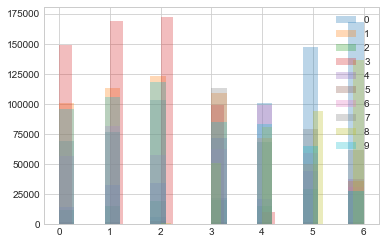

month


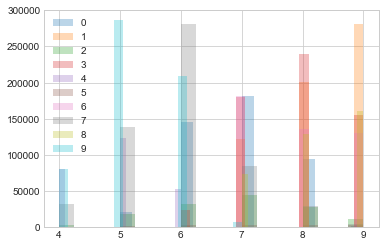

hour


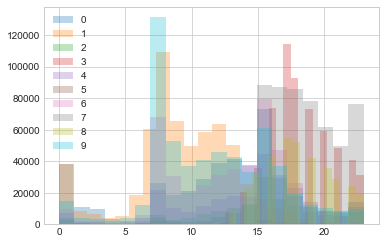

num_week


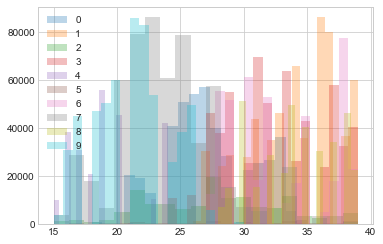

end_station_code


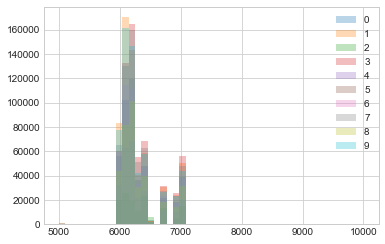

duration_min


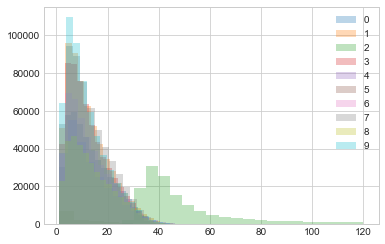

humidity


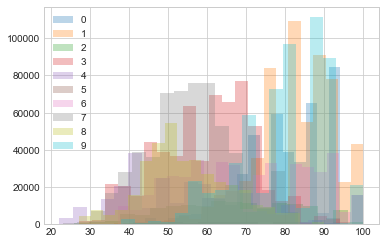

pressure


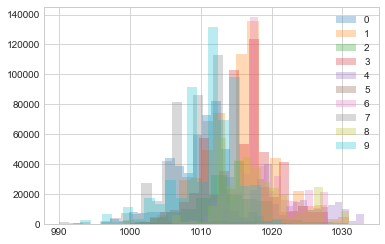

temp_celsius


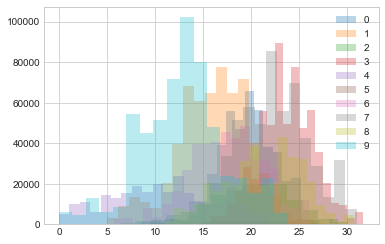

wind_speed


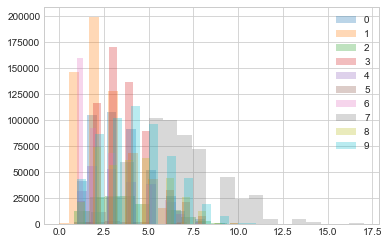

wind_direction


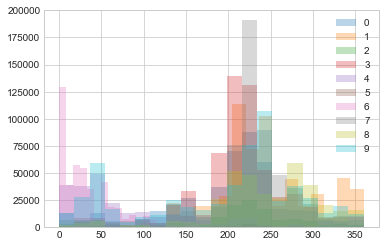

In [81]:
# Analyze the results
for col in X_columns:
    print(col)
    for cluster in set(kmeans.labels_):
        plt.hist(df_results[df_results['cluster']==cluster][col], label=str(cluster), alpha=0.3, bins=20)
    plt.legend()
    plt.show()

# Model Evaluation

In [82]:
# Inter-Cluster
centroids = []
for cluster in sorted(set(kmeans.labels_)):
    centroids.append(df_norm[df_norm['cluster']==cluster][X_columns].mean().values)
distances = []
for c1 in centroids:
    for c2 in centroids:
        distances.append(euclidean_distances(c1.reshape(-1, 1), c2.reshape(-1, 1))[0][0])
print('Inter Cluster distance', np.mean(distances))

# Intra-Cluster
distances = []
for cluster in sorted(set(kmeans.labels_)):
    df_filter = df_norm[df_norm['cluster']==cluster]
    centroid = df_filter[X_columns].mean().values
    for k, v in df_filter[X_columns].iterrows():
        distances.append(euclidean_distances(centroid.reshape(-1, 1), v.values.reshape(-1, 1))[0][0])
print('Intra Cluster distance', np.mean(distances))

# Inertia
distances = []
for cluster in sorted(set(kmeans.labels_)):
    df_filter = df_norm[df_norm['cluster']==cluster]
    centroid = df_filter[X_columns].mean().values
    for k, v in df_filter[X_columns].iterrows():
        distances.append(euclidean_distances(centroid.reshape(1, -1), v.values.reshape(1, -1), squared=True)[0][0])
print('Inertia', np.sum(distances))

Inter Cluster distance 0.584374626792775
Intra Cluster distance 0.6725433865015311
Inertia 24043557.985030912


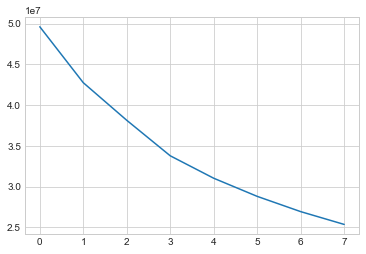

In [85]:
inertia = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(df_norm.values)
    inertia.append(kmeans.inertia_)
plt.plot(inertia)
plt.show()